<a href="https://colab.research.google.com/github/Simmi-aggarwal16/Customer_Ad_Clicks/blob/main/Machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PROJECT

###TASK 1: EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/advertising_ef.csv')

In [ ]:
data.head()

Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                     68.95  35.0     61833.90                256.09   
1                       NaN  31.0     68441.85                193.77   
2                     69.47  26.0     59785.94                236.50   
3                     74.15  29.0     54806.18                245.89   
4                     68.37  35.0     73889.99                225.58   

                           Ad Topic Line            City  Gender     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh  Female     Tunisia   
1     Monitored national standardization       West Jodi    Male       Nauru   
2       Organic bottom-line service-desk        Davidton  Female  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt    Male       Italy   
4          Robust logistical utilization    South Manuel  Female     Iceland   

          Timestamp  Clicked on Ad  
0  27-03-2016 00:53              0  
1  04-04-2016 01:39              0  
2  13-03-2016 20:35              0  
3  10-01-2016 02:31              0  
4  03-06-2016 03:36              0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1005 non-null   float64
 1   Age                       998 non-null    float64
 2   Area Income               998 non-null    float64
 3   Daily Internet Usage      1005 non-null   float64
 4   Ad Topic Line             1009 non-null   object 
 5   City                      998 non-null    object 
 6   Gender                    1009 non-null   object 
 7   Country                   996 non-null    object 
 8   Timestamp                 1009 non-null   object 
 9   Clicked on Ad             1009 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 79.0+ KB


Are there any missing values in the dataset related to ad data or customer engagement metrics? How should these missing values be handled?


In [ ]:
data.isna().sum()

Daily Time Spent on Site     4
Age                         11
Area Income                 11
Daily Internet Usage         4
Ad Topic Line                0
City                        11
Gender                       0
Country                     13
Timestamp                    0
Clicked on Ad                0
dtype: int64

data.isna().sum() gives us the null values present in the columns of the dataset

We can Impute the missing values with median or mode

In [ ]:
data.rename(columns={'Daily Time Spent on Site':'Daily_Time_Spent_on_Site'}, inplace=True)

In [ ]:
print("mean = ",data['Daily_Time_Spent_on_Site'].mean())
print("median = ",data['Daily_Time_Spent_on_Site'].median())

mean =  65.00946268656716
median =  68.37


In [ ]:
data['Daily_Time_Spent_on_Site'].fillna(data['Daily_Time_Spent_on_Site'].median(),inplace=True)

Thus, We replaced the null values of Daily Time Spent On Site with its Median

In [ ]:
#replacing null values for the 'Age' column
print(data['Age'].mean())
print(data['Age'].median())
data['Age'].fillna(data['Age'].median(),inplace=True)

35.96292585170341
35.0


In [ ]:
#replacing null values for the 'Area Income' column
print(data['Area Income'].mean())
print(data['Area Income'].median())
data['Area Income'].fillna(data['Area Income'].mean(),inplace=True)

54958.57361723447
56998.245


rounding off the data upto two decimal places

In [ ]:
data['Area Income'] = np.around(data['Area Income'],decimals=2)

In [ ]:
#replacing null values for the 'Daily Internet Usage' column
data['Daily Internet Usage'].fillna(data['Daily Internet Usage'].mean(),inplace=True)

In [ ]:
data['City'].fillna(data['City'].value_counts().index[0],inplace=True)

In [ ]:
data['Country'].value_counts().index[0]
data['Country'].fillna(data['Country'].value_counts().index[0],inplace=True)

In [ ]:
data.isna().sum()

Daily_Time_Spent_on_Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

Thus, all the null values were replaced.

In [ ]:
data.corr()

<ipython-input-19-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


Daily_Time_Spent_on_Site       Age  Area Income  \
Daily_Time_Spent_on_Site                  1.000000 -0.327560     0.310296   
Age                                      -0.327560  1.000000    -0.178185   
Area Income                               0.310296 -0.178185     1.000000   
Daily Internet Usage                      0.514047 -0.366353     0.331394   
Clicked on Ad                            -0.742900  0.487808    -0.472515   

                          Daily Internet Usage  Clicked on Ad  
Daily_Time_Spent_on_Site              0.514047      -0.742900  
Age                                  -0.366353       0.487808  
Area Income                           0.331394      -0.472515  
Daily Internet Usage                  1.000000      -0.785501  
Clicked on Ad                        -0.785501       1.000000

Interpretation of the Correlation Table:


*   The diagonal elements represent the correlation of each variable with itself, which is always 1.
*   For example, the correlation coefficient between "Daily Time Spent on Site" and "Age" is -0.327560. This indicates a moderate negative correlation, suggesting that as the age increases, the daily time spent on the site tends to decrease.
* The correlation coefficient between "Clicked on Ad" and "Daily Time Spent on Site" is -0.742900, indicating a strong negative correlation. This implies that as the daily time spent on the site decreases, the likelihood of clicking on an ad increases.

Are there any duplicate entries in the dataset that need to be identified and removed?

In [ ]:
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Daily_Time_Spent_on_Site, Age, Area Income, Daily Internet Usage, Ad Topic Line, City, Gender, Country, Timestamp, Clicked on Ad]
Index: []


In [ ]:
duplicate_rows = data[data.duplicated(subset=['Daily_Time_Spent_on_Site', 'Age'])]
print(duplicate_rows)

      Daily_Time_Spent_on_Site   Age  Area Income  Daily Internet Usage  \
200                      84.53  27.0     40763.13                168.34   
377                      80.49  40.0     67186.54                229.12   
617                      68.37  31.0     66176.97                242.59   
686                      69.47  26.0     59785.94                236.50   
785                      75.55  36.0     31998.72                123.71   
798                      77.89  26.0     64188.50                201.54   
860                      75.03  34.0     35764.49                255.57   
1008                     45.01  26.0     29875.80                178.35   

                                  Ad Topic Line              City  Gender  \
200              Stand-alone tangible moderator                    Female   
377                 Balanced heuristic approach          Amyhaven    Male   
617           Programmable high-level benchmark       Anthonyfurt  Female   
686            O

In [ ]:
duplicate_rows = data[data.duplicated(subset=['Daily_Time_Spent_on_Site', 'Area Income'])]
print(duplicate_rows)

      Daily_Time_Spent_on_Site   Age  Area Income  Daily Internet Usage  \
200                      84.53  27.0     40763.13                168.34   
377                      80.49  40.0     67186.54                229.12   
686                      69.47  26.0     59785.94                236.50   
798                      77.89  26.0     64188.50                201.54   
901                      36.37  35.0     47338.94                144.53   
1008                     45.01  26.0     29875.80                178.35   

                                   Ad Topic Line                City  Gender  \
200               Stand-alone tangible moderator                      Female   
377                  Balanced heuristic approach            Amyhaven    Male   
686             Organic bottom-line service-desk        Williamsport  Female   
798               Switchable multi-state success         West Sharon  Female   
901   Quality-focused zero-defect data-warehouse  North Jessicaville    Ma

In [ ]:
duplicate_rows = data[data.duplicated(subset=['Daily_Time_Spent_on_Site', 'Daily Internet Usage'])]
print(duplicate_rows)

     Daily_Time_Spent_on_Site   Age  Area Income  Daily Internet Usage  \
200                     84.53  27.0     40763.13                168.34   
377                     80.49  40.0     67186.54                229.12   
686                     69.47  26.0     59785.94                236.50   
798                     77.89  26.0     64188.50                201.54   
901                     36.37  35.0     47338.94                144.53   
950                     79.51  39.0     54958.57                125.11   

                                  Ad Topic Line                City  Gender  \
200              Stand-alone tangible moderator                      Female   
377                 Balanced heuristic approach            Amyhaven    Male   
686            Organic bottom-line service-desk        Williamsport  Female   
798              Switchable multi-state success         West Sharon  Female   
901  Quality-focused zero-defect data-warehouse  North Jessicaville    Male   
950    

In [ ]:
duplicate_rows = data[data.duplicated(subset=['Daily_Time_Spent_on_Site', 'Country'])]
print(duplicate_rows)

      Daily_Time_Spent_on_Site   Age  Area Income  Daily Internet Usage  \
200                      84.53  27.0     40763.13                168.34   
686                      69.47  26.0     59785.94                236.50   
860                      75.03  34.0     35764.49                255.57   
901                      36.37  35.0     47338.94                144.53   
950                      79.51  39.0     54958.57                125.11   
1008                     45.01  26.0     29875.80                178.35   

                                   Ad Topic Line                City  Gender  \
200               Stand-alone tangible moderator                      Female   
686             Organic bottom-line service-desk        Williamsport  Female   
860                 Networked local secured line           East Mike  Female   
901   Quality-focused zero-defect data-warehouse  North Jessicaville    Male   
950            Proactive non-volatile encryption   North Charlesbury    Ma

Thus,duplicates were detected.

What is the distribution of different demographic variables in the dataset (e.g., age, gender, country)?

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

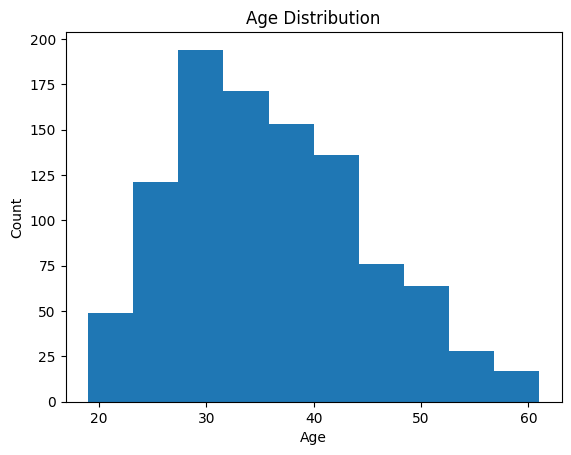

In [ ]:
# Age Distribution
plt.hist(data['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

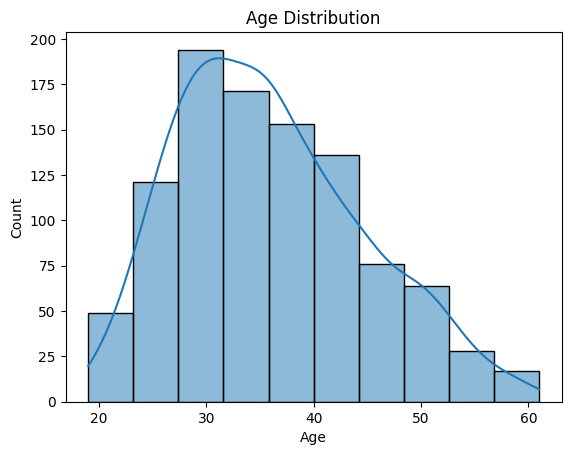

In [ ]:
sns.histplot(data['Age'], bins=10, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

<ipython-input-28-8b96879b4d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

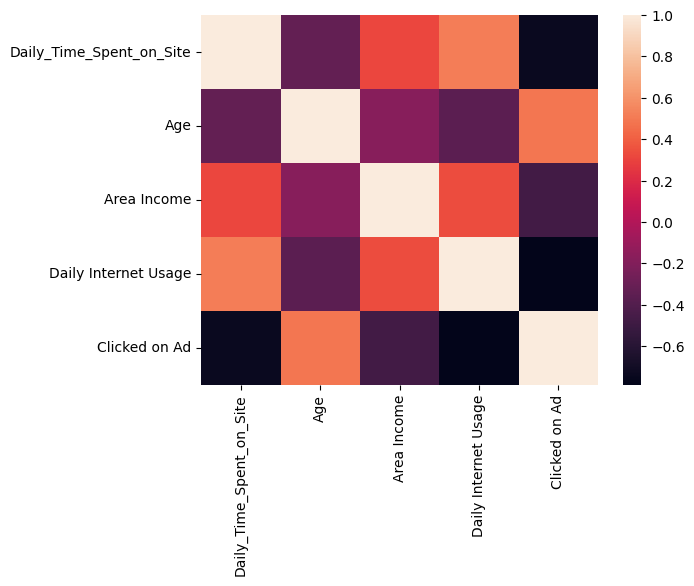

In [ ]:
sns.heatmap(data.corr())

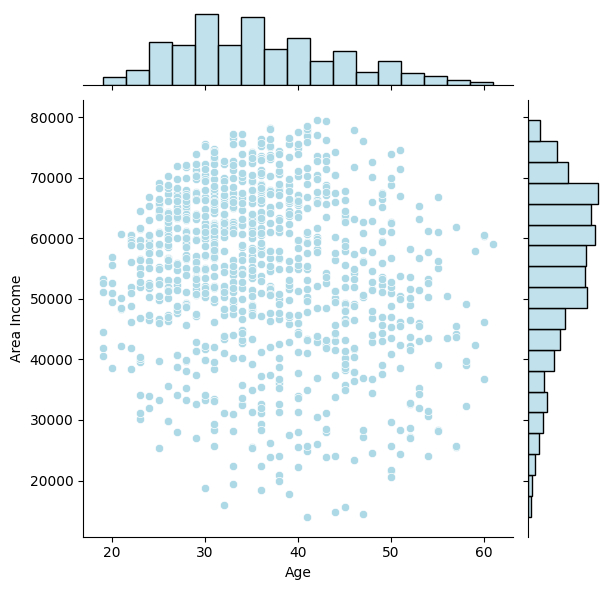

In [ ]:
sns.jointplot(x='Age', y='Area Income', data=data, color="lightblue")

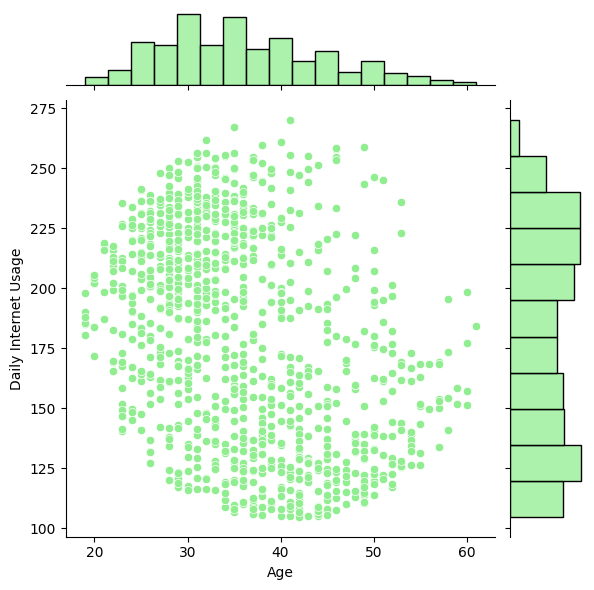

In [ ]:
#joint plot between Age and Daily Internet Usage
sns.jointplot(x='Age', y='Daily Internet Usage', data=data, color='lightgreen')

Analysing the relation between each and every variable present in the dataset with target function Clicked On Ad

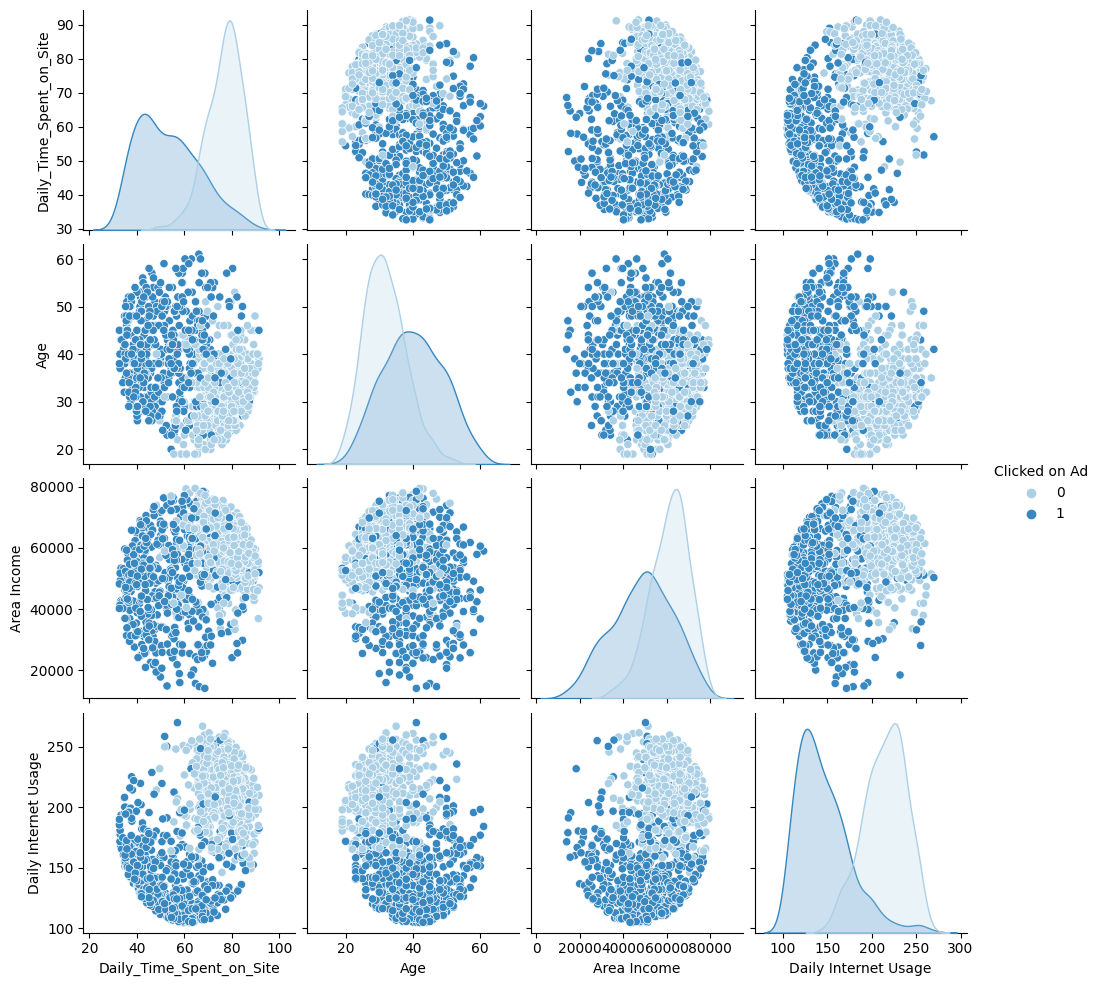

In [ ]:
sns.pairplot(data, hue='Clicked on Ad', palette="Blues")

How are the numerical variables (e.g., "Daily Time Spent on Site," "Age," "Area Income") distributed? Are there any outliers?

Text(0.5, 1.0, 'Box Plot of Daily Time Spent on Site')

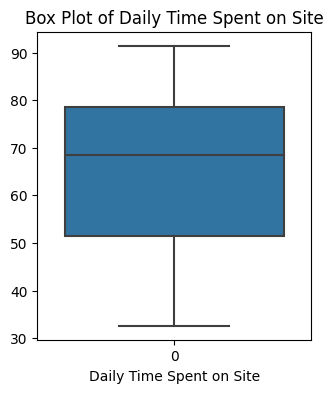

In [ ]:
# using box plots to identify potential outliers
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(data['Daily_Time_Spent_on_Site'])
plt.xlabel('Daily Time Spent on Site')
plt.title('Box Plot of Daily Time Spent on Site')

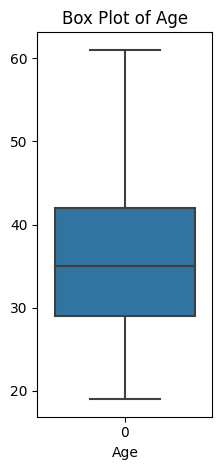

In [ ]:
plt.subplot(1, 3, 2)
sns.boxplot(data['Age'])
plt.xlabel('Age')
plt.title('Box Plot of Age')
plt.tight_layout()
plt.show()

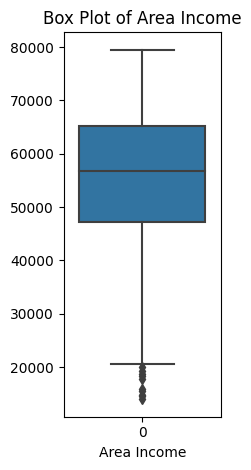

In [ ]:
plt.subplot(1, 3, 3)
sns.boxplot(data['Area Income'])
plt.xlabel('Area Income')
plt.title('Box Plot of Area Income')
plt.tight_layout()
plt.show()

Here, the points outside the whiskers, i.e below 20000 Area Income; are the potential outliers

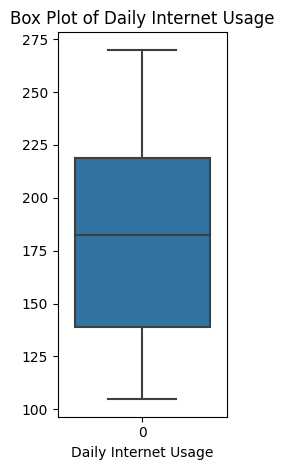

In [ ]:
plt.subplot(1, 3, 3)
sns.boxplot(data['Daily Internet Usage'])
plt.xlabel('Daily Internet Usage')
plt.title('Box Plot of Daily Internet Usage')
plt.tight_layout()
plt.show()

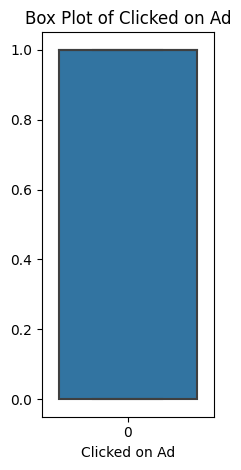

In [ ]:
plt.subplot(1, 3, 3)
sns.boxplot(data['Clicked on Ad'])
plt.xlabel('Clicked on Ad')
plt.title('Box Plot of Clicked on Ad')
plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats
# Calculate z-scores for each numerical variable
z_scores = np.abs(stats.zscore(data[['Daily_Time_Spent_on_Site', 'Age', 'Area Income','Daily Internet Usage','Clicked on Ad']]))
# Set a threshold for z-score
threshold = 3
# Find the indices of outliers
outlier_indices = np.where(z_scores > threshold)
# Print the indices of outliers
print(outlier_indices)

(array([696, 772, 782]), array([2, 2, 2]))


In [ ]:
data.iloc[[696, 772, 782]]   #outliers

Daily_Time_Spent_on_Site   Age  Area Income  Daily Internet Usage  \
696                     66.26  47.0     14548.06                179.04   
772                     68.58  41.0     13996.50                171.54   
782                     52.67  44.0     14775.50                191.26   

                                Ad Topic Line              City  Gender  \
696            Optional full-range projection       Matthewtown    Male   
772               Exclusive discrete firmware  New Williamville    Male   
782  Persevering 5thgeneration knowledge user     New Hollyberg  Female   

         Country         Timestamp  Clicked on Ad  
696      Lebanon  25-04-2016 19:31              1  
772  El Salvador  06-07-2016 12:04              1  
782       Jersey  19-05-2016 06:37              1

array([696, 772, 782]): This array contains the indices of the potential outliers in the dataset. In this case, the outliers are located at indices 696, 772, and 782.

All three potential outliers have a z-score of 2, indicating that they are 2 standard deviations away from the mean.

Checking Whether There is Class imbalance in the Dataset:

In [ ]:
data['Clicked on Ad'].value_counts()

1    506
0    503
Name: Clicked on Ad, dtype: int64

* Occurence of '1' = 506
* Occurrence of '0' is 503.

So there is not much difference and there both are equally probable in the dataset.

In [ ]:
data.to_csv('Cleaned_Advertisements.csv')

How does the average time spent on the website vary for different demographic groups?

In [ ]:
average_time_by_gender = data.groupby('Gender')['Daily_Time_Spent_on_Site'].mean()
average_time_by_age = data.groupby('Age')['Daily_Time_Spent_on_Site'].mean()
average_time_by_country = data.groupby('Country')['Daily_Time_Spent_on_Site'].mean()

In [ ]:
print(average_time_by_gender)
print(average_time_by_age)
print(average_time_by_country)

Gender
Female    65.344857
Male      64.673430
Name: Daily_Time_Spent_on_Site, dtype: float64
Age
19.0    60.966667
20.0    66.708333
21.0    68.134000
22.0    71.010000
23.0    68.333158
24.0    71.245714
25.0    71.360741
26.0    69.032000
27.0    72.401818
28.0    69.783542
29.0    68.819149
30.0    70.937692
31.0    70.877833
32.0    72.170526
33.0    68.890930
34.0    70.215500
35.0    66.180000
36.0    66.815600
37.0    67.152500
38.0    59.214324
39.0    61.964667
40.0    63.917143
41.0    59.571290
42.0    55.316923
43.0    58.554348
44.0    62.229524
45.0    55.490333
46.0    61.033333
47.0    53.935833
48.0    54.330000
49.0    53.220000
50.0    53.321500
51.0    55.814167
52.0    52.092143
53.0    53.177000
54.0    55.330000
55.0    60.077143
56.0    44.720000
57.0    62.778333
58.0    60.327500
59.0    56.600000
60.0    64.150000
61.0    66.080000
Name: Daily_Time_Spent_on_Site, dtype: float64
Country
Afghanistan          64.782500
Albania              63.371429
Algeria    

Interpretation:

1. Average Time Spent on Site by Gender:
   - Female: The average daily time spent on the site for females is approximately 65.34 minutes.
   - Male: The average daily time spent on the site for males is approximately 64.67 minutes.

This suggests that females spend slightly more time compared to males.

2. Average Time Spent on Site by Age:
   - Example: for individuals aged 19, the average time spent is approximately 60.97 minutes.
   - The pattern continues for different age groups, with varying average times spent on the site.
   - The highest average times are observed in the 22-32 age range
   - The average times tend to decrease for older age groups.

3. Average Time Spent on Site by Country:
   - Example: the average time spent for individuals from Afghanistan is approximately 64.78 minutes.
  - Each country has its own average time, indicating potential differences in user engagement or behavior across geographic regions.


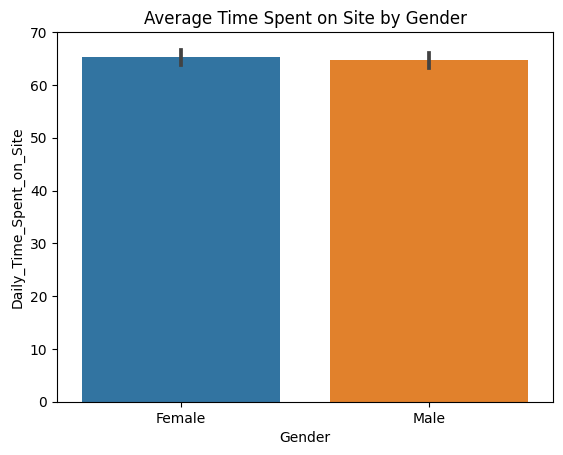

In [ ]:
sns.barplot(x='Gender', y='Daily_Time_Spent_on_Site', data=data)
plt.title('Average Time Spent on Site by Gender')
plt.show()

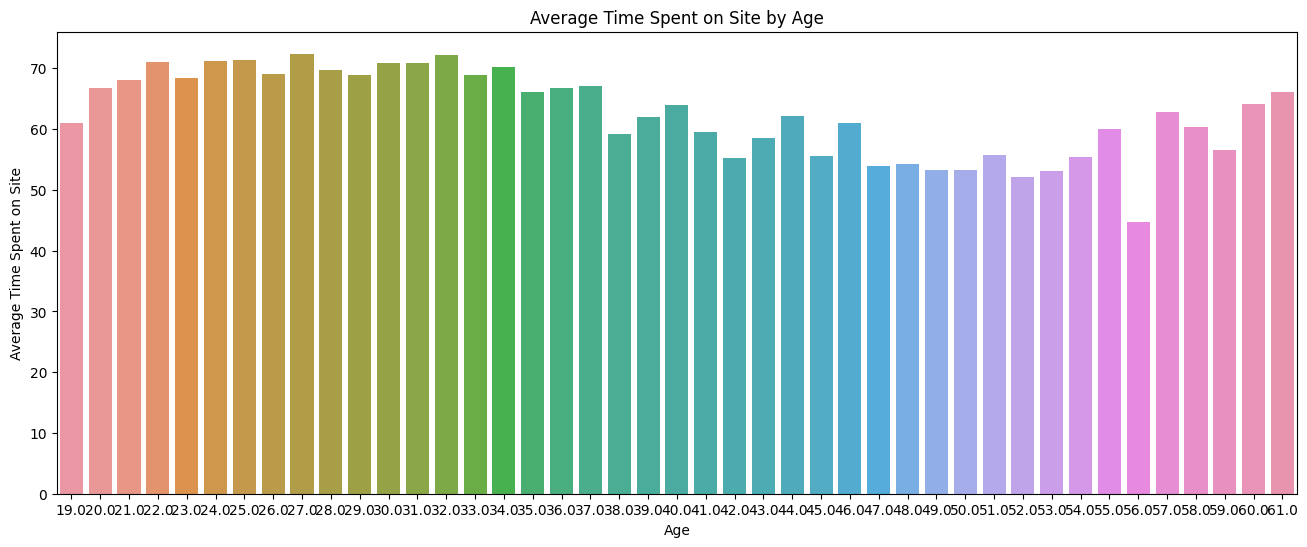

In [ ]:
average_time_by_age = data.groupby('Age')['Daily_Time_Spent_on_Site'].mean().reset_index()
average_time_by_age = average_time_by_age.sort_values(by='Age')
plt.figure(figsize=(16, 6))
sns.barplot(x='Age', y='Daily_Time_Spent_on_Site', data=average_time_by_age)
plt.title('Average Time Spent on Site by Age')
plt.xlabel('Age')
plt.ylabel('Average Time Spent on Site')
plt.show()

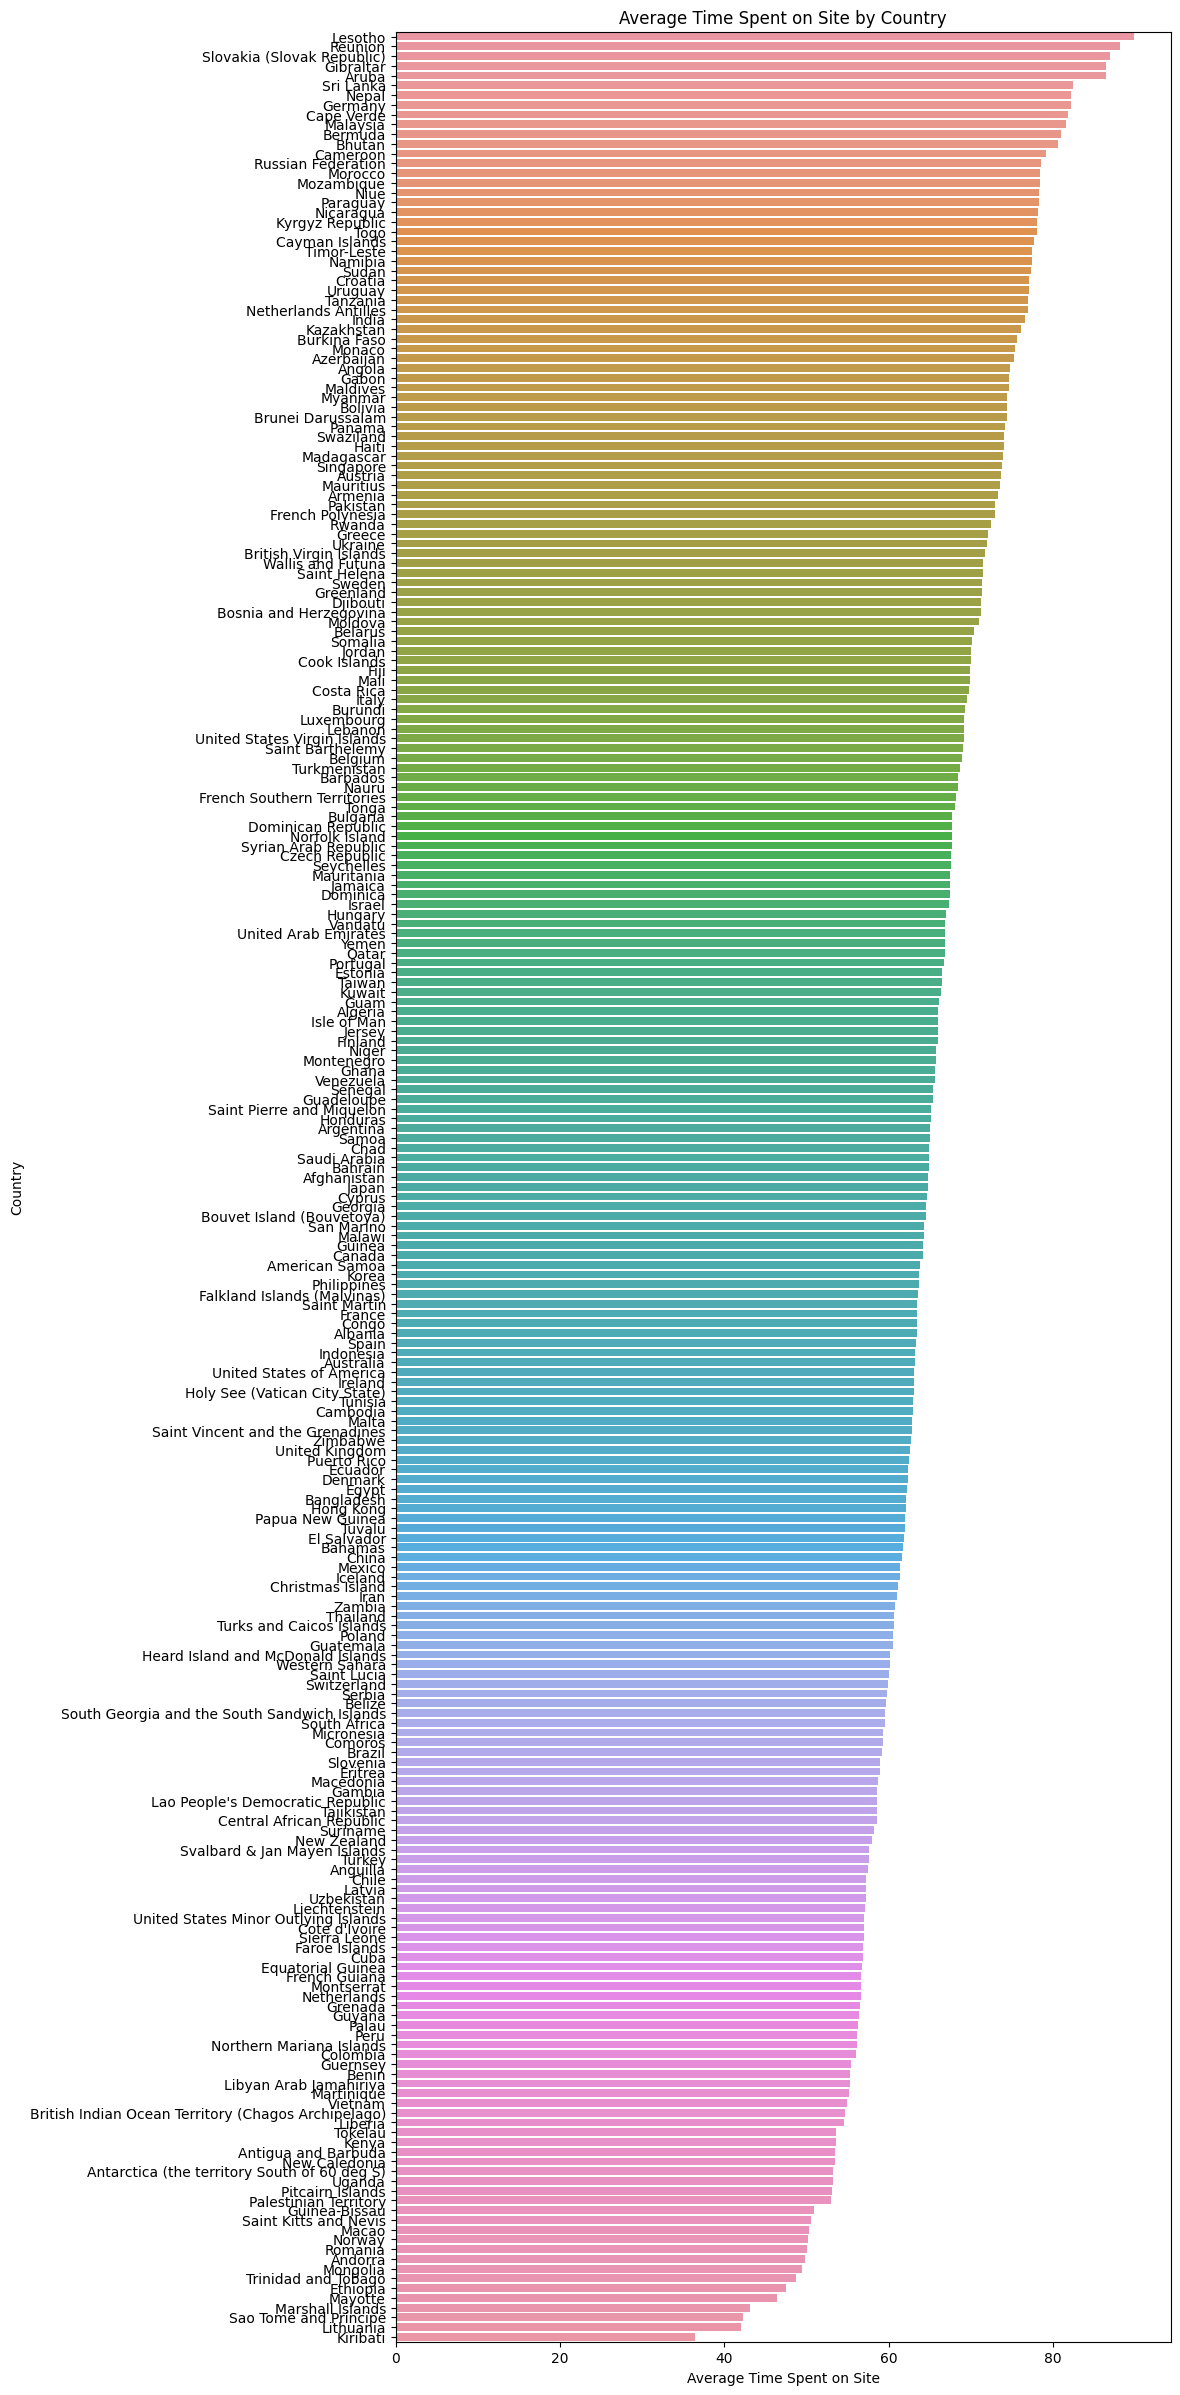

In [ ]:
average_time_by_country = data.groupby('Country')['Daily_Time_Spent_on_Site'].mean().reset_index()
average_time_by_country = average_time_by_country.sort_values(by='Daily_Time_Spent_on_Site', ascending=False)
plt.figure(figsize=(10, 30))
sns.barplot(x='Daily_Time_Spent_on_Site', y='Country', data=average_time_by_country)
plt.title('Average Time Spent on Site by Country')
plt.xlabel('Average Time Spent on Site')
plt.ylabel('Country')
plt.show()

# TASK 2

###Data Preprocessing

In [ ]:
data = pd.read_csv('Cleaned_Advertisements.csv')
data.head()

Unnamed: 0  Daily_Time_Spent_on_Site   Age  Area Income  \
0           0                     68.95  35.0     61833.90   
1           1                     68.37  31.0     68441.85   
2           2                     69.47  26.0     59785.94   
3           3                     74.15  29.0     54806.18   
4           4                     68.37  35.0     73889.99   

   Daily Internet Usage                          Ad Topic Line  \
0                256.09     Cloned 5thgeneration orchestration   
1                193.77     Monitored national standardization   
2                236.50       Organic bottom-line service-desk   
3                245.89  Triple-buffered reciprocal time-frame   
4                225.58          Robust logistical utilization   

             City  Gender     Country         Timestamp  Clicked on Ad  
0     Wrightburgh  Female     Tunisia  27-03-2016 00:53              0  
1       West Jodi    Male       Nauru  04-04-2016 01:39              0  
2        Davidton  Female  San Marino  13-03-2016 20:35              0  
3  West Terrifurt    Male       Italy  10-01-2016 02:31              0  
4    South Manuel  Female     Iceland  03-06-2016 03:36              0

Here, We have an Unnamed Column

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1009 non-null   int64  
 1   Daily_Time_Spent_on_Site  1009 non-null   float64
 2   Age                       1009 non-null   float64
 3   Area Income               1009 non-null   float64
 4   Daily Internet Usage      1009 non-null   float64
 5   Ad Topic Line             1009 non-null   object 
 6   City                      1009 non-null   object 
 7   Gender                    1009 non-null   object 
 8   Country                   1009 non-null   object 
 9   Timestamp                 1009 non-null   object 
 10  Clicked on Ad             1009 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 86.8+ KB


In [ ]:
#Checking the number of unique values present in column AD Topic Line, City And Country

In [ ]:
object_Dtype = ['Ad Topic Line', 'City', 'Country']
data[object_Dtype].describe(include=['O'])

Ad Topic Line          City         Country
count                                1009          1009            1009
unique                               1000           961             237
top     Proactive non-volatile encryption  Williamsport  Czech Republic
freq                                    2            14              22

We can see these columns have many unique values in them which will make it difficult to find a pattern from these columns to make a suitable model for predicting.
Therefore, we reject the columns : Ad Topic Line, City and, Country

###Feature Engineering

Handling missing values(performed in task 1)

Time-based features:

In [ ]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Month'] = data['Timestamp'].dt.month
data['Hour'] = data['Timestamp'].dt.hour
data = data.drop(['Timestamp'], axis=1)
data.head()

Unnamed: 0  Daily_Time_Spent_on_Site   Age  Area Income  \
0           0                     68.95  35.0     61833.90   
1           1                     68.37  31.0     68441.85   
2           2                     69.47  26.0     59785.94   
3           3                     74.15  29.0     54806.18   
4           4                     68.37  35.0     73889.99   

   Daily Internet Usage                          Ad Topic Line  \
0                256.09     Cloned 5thgeneration orchestration   
1                193.77     Monitored national standardization   
2                236.50       Organic bottom-line service-desk   
3                245.89  Triple-buffered reciprocal time-frame   
4                225.58          Robust logistical utilization   

             City  Gender     Country  Clicked on Ad  Month  Hour  
0     Wrightburgh  Female     Tunisia              0      3     0  
1       West Jodi    Male       Nauru              0      4     1  
2        Davidton  Female  San Marino              0      3    20  
3  West Terrifurt    Male       Italy              0     10     2  
4    South Manuel  Female     Iceland              0      3     3

The dataset contains time-related information, thus we extracted features like month and hour

In [ ]:
data.drop('Unnamed: 0',axis=1,inplace=True)

Encoding categorical variables:

In [ ]:
# We will Label Encode the Gender,Ad Topic Line,City and Country columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Ad Topic Line'] = label_encoder.fit_transform(data['Ad Topic Line'])
data['City'] = label_encoder.fit_transform(data['City'])
data['Country'] = label_encoder.fit_transform(data['Country'])
data.head()

Daily_Time_Spent_on_Site   Age  Area Income  Daily Internet Usage  \
0                     68.95  35.0     61833.90                256.09   
1                     68.37  31.0     68441.85                193.77   
2                     69.47  26.0     59785.94                236.50   
3                     74.15  29.0     54806.18                245.89   
4                     68.37  35.0     73889.99                225.58   

   Ad Topic Line  City  Gender  Country  Clicked on Ad  Month  Hour  
0             91   953       0      215              0      3     0  
1            464   895       1      147              0      4     1  
2            566   112       0      184              0      3    20  
3            903   931       1      103              0     10     2  
4            766   799       0       96              0      3     3

In [ ]:
data.corr()

Daily_Time_Spent_on_Site       Age  Area Income  \
Daily_Time_Spent_on_Site                  1.000000 -0.327560     0.310296   
Age                                      -0.327560  1.000000    -0.178185   
Area Income                               0.310296 -0.178185     1.000000   
Daily Internet Usage                      0.514047 -0.366353     0.331394   
Ad Topic Line                            -0.019724 -0.022755    -0.035913   
City                                     -0.015403 -0.019017    -0.005455   
Gender                                   -0.021174 -0.016146     0.008326   
Country                                  -0.017322  0.005719     0.042663   
Clicked on Ad                            -0.742900  0.487808    -0.472515   
Month                                    -0.021973  0.021373    -0.034775   
Hour                                      0.005661 -0.054559     0.030579   

                          Daily Internet Usage  Ad Topic Line      City  \
Daily_Time_Spent_on_Site              0.514047      -0.019724 -0.015403   
Age                                  -0.366353      -0.022755 -0.019017   
Area Income                           0.331394      -0.035913 -0.005455   
Daily Internet Usage                  1.000000      -0.005271 -0.008729   
Ad Topic Line                        -0.005271       1.000000 -0.025866   
City                                 -0.008729      -0.025866  1.000000   
Gender                                0.027567      -0.030139  0.015486   
Country                               0.004899       0.040666  0.000633   
Clicked on Ad                        -0.785501       0.027450 -0.010701   
Month                                -0.002890       0.029966  0.046664   
Hour                                  0.073225       0.011374 -0.014643   

                            Gender   Country  Clicked on Ad     Month  \
Daily_Time_Spent_on_Site -0.021174 -0.017322      -0.742900 -0.021973   
Age                      -0.016146  0.005719       0.487808  0.021373   
Area Income               0.008326  0.042663      -0.472515 -0.034775   
Daily Internet Usage      0.027567  0.004899      -0.785501 -0.002890   
Ad Topic Line            -0.030139  0.040666       0.027450  0.029966   
City                      0.015486  0.000633      -0.010701  0.046664   
Gender                    1.000000 -0.024365      -0.038563 -0.029448   
Country                  -0.024365  1.000000       0.015055 -0.009420   
Clicked on Ad            -0.038563  0.015055       1.000000  0.039507   
Month                    -0.029448 -0.009420       0.039507  1.000000   
Hour                      0.053415  0.004377      -0.049069 -0.005081   

                              Hour  
Daily_Time_Spent_on_Site  0.005661  
Age                      -0.054559  
Area Income               0.030579  
Daily Internet Usage      0.073225  
Ad Topic Line             0.011374  
City                     -0.014643  
Gender                    0.053415  
Country                   0.004377  
Clicked on Ad            -0.049069  
Month                    -0.005081  
Hour                      1.000000

<Axes: >

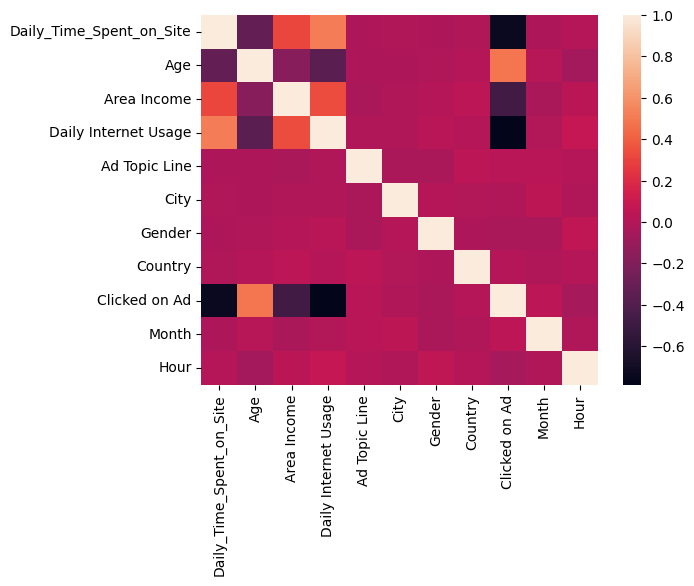

In [ ]:
sns.heatmap(data.corr())

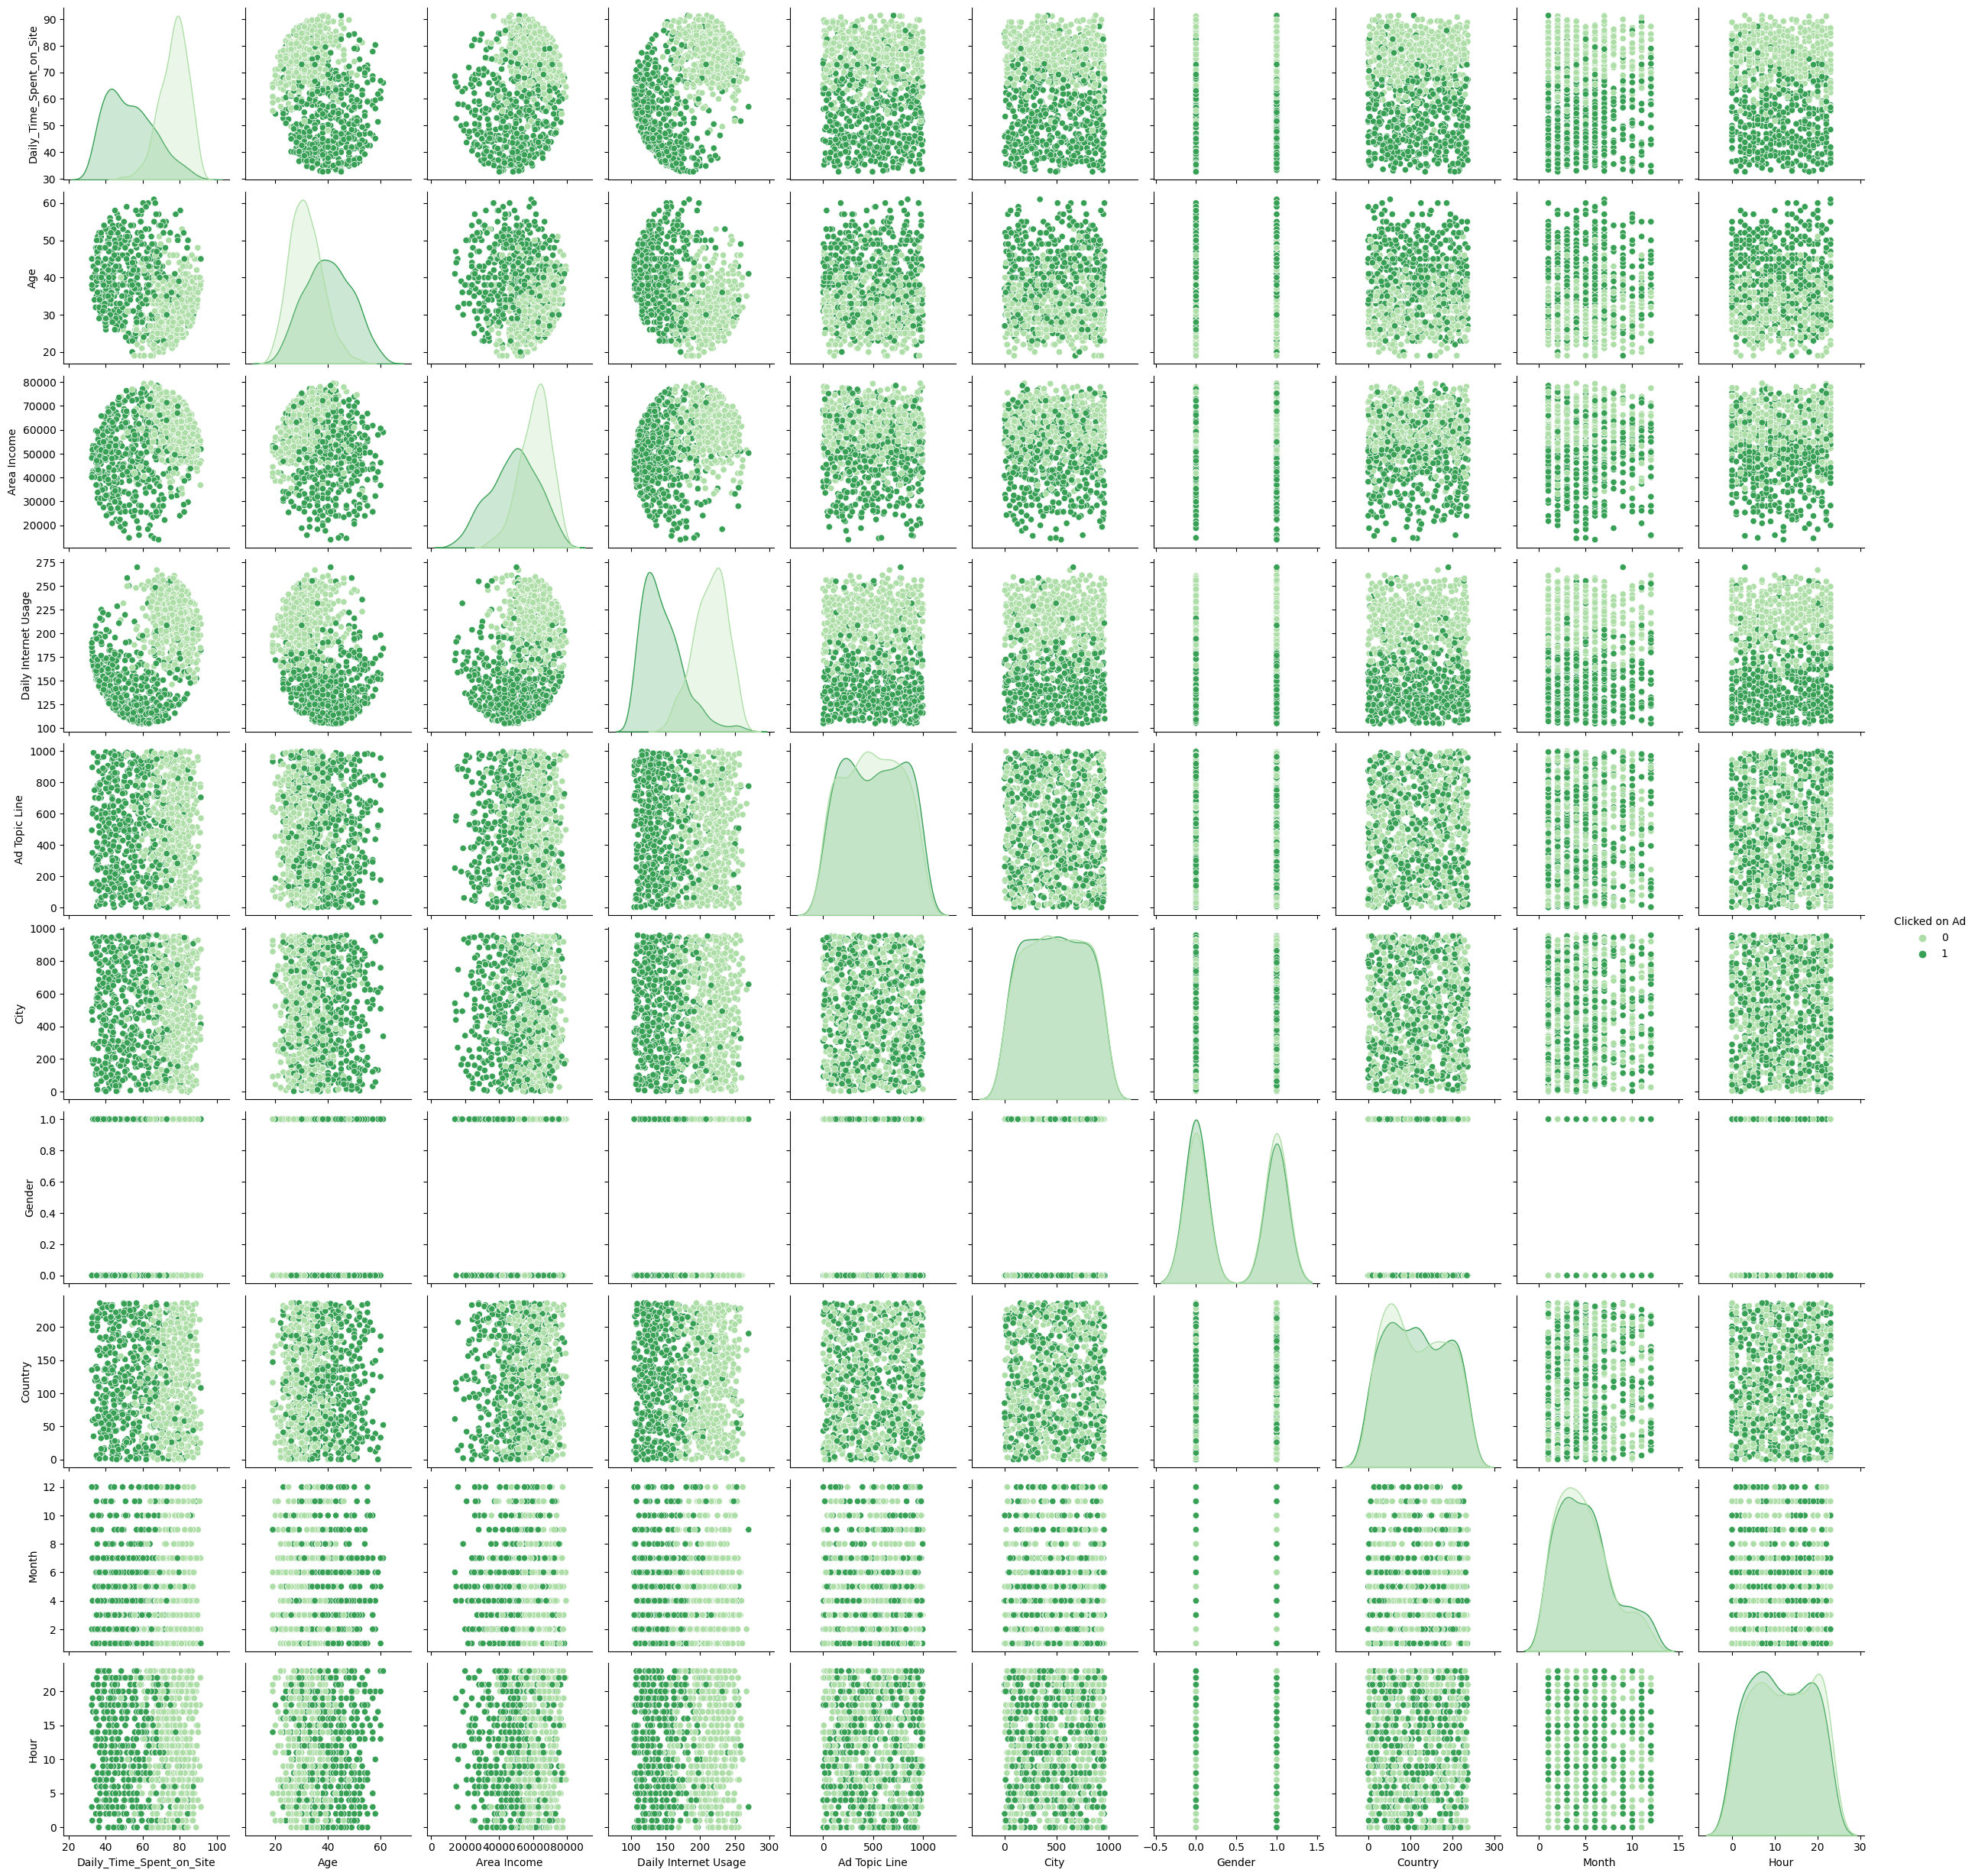

In [ ]:
sns.pairplot(data, hue='Clicked on Ad', palette="Greens")

###Split dataset in train-test (80:20 ratio)

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop('Clicked on Ad', axis=1)
y = data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (807, 10)
X_test shape: (202, 10)
y_train shape: (807,)
y_test shape: (202,)


we assume that the target variable is named 'Clicked on Ad' and we are using all the other columns as features.
The test_size parameter is set to 0.2, indicating that 20% of the data will be used for testing, while the remaining 80% will be used for training.

In [ ]:
X,y

(      Daily_Time_Spent_on_Site   Age  Area Income  Daily Internet Usage  \
 0                        68.95  35.0     61833.90                256.09   
 1                        68.37  31.0     68441.85                193.77   
 2                        69.47  26.0     59785.94                236.50   
 3                        74.15  29.0     54806.18                245.89   
 4                        68.37  35.0     73889.99                225.58   
 ...                        ...   ...          ...                   ...   
 1004                     72.97  30.0     71384.57                208.58   
 1005                     51.30  45.0     67782.17                134.42   
 1006                     51.63  51.0     42415.72                120.37   
 1007                     55.55  19.0     41920.79                187.95   
 1008                     45.01  26.0     29875.80                178.35   
 
       Ad Topic Line  City  Gender  Country  Month  Hour  
 0                91   953 

###Model selection

The Dataset is a Classification Dataset i.e it predicts values either '0' i.e Didn't Click on Ad or '1' i.e clicked on Ad therefore the models which we can apply on the dataset could be :

* Desicion Tree Classifier, or
* Logistic Regression, or
* Simple Vector Method (SVM)


###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9356435643564357

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        96
           1       0.96      0.92      0.94       106

    accuracy                           0.94       202
   macro avg       0.94      0.94      0.94       202
weighted avg       0.94      0.94      0.94       202

[[92  4]
 [ 9 97]]


The model gives 90.42% accuracy

##Fine-tuning the model

 we apply hyperparameter tuning 'newton-cg' on the LoR model to increase the efficiency of the model

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='newton-cg')
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(solver='newton-cg')

In [ ]:
predictions = logmodel.predict(X_test)
accuracy_score(y_test, predictions)

0.9603960396039604

In [ ]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        96
           1       0.97      0.95      0.96       106

    accuracy                           0.96       202
   macro avg       0.96      0.96      0.96       202
weighted avg       0.96      0.96      0.96       202

[[ 93   3]
 [  5 101]]


After applying hyperparameter tuning on the LoR model we got the accuracy increased to 96.03%

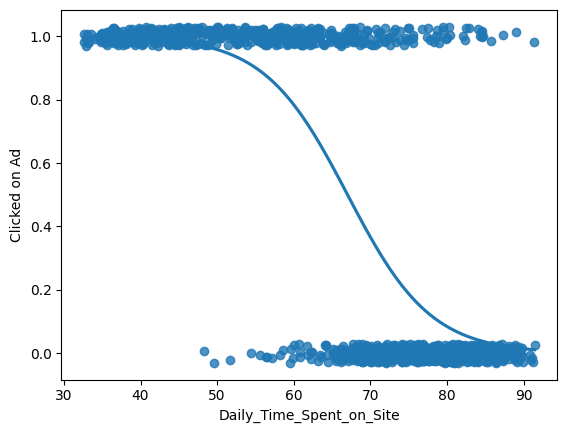

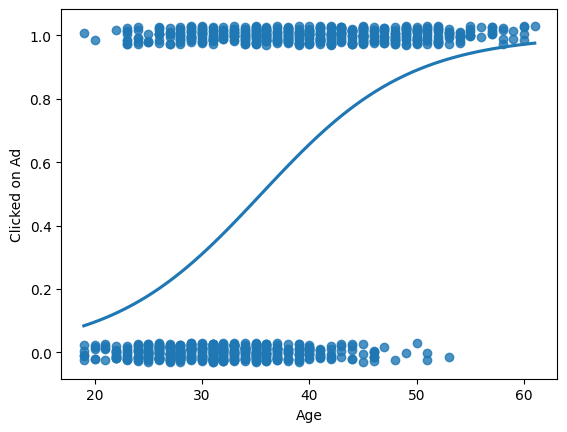

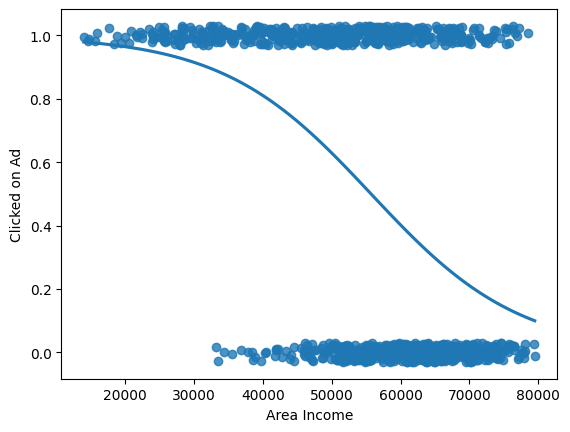

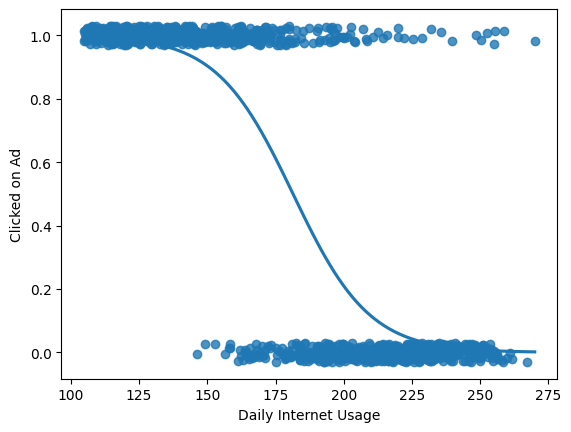

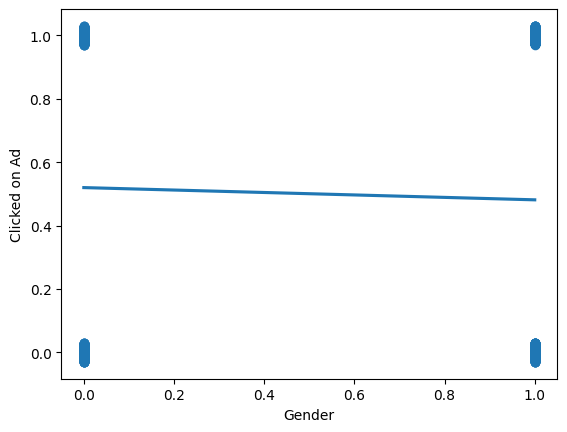

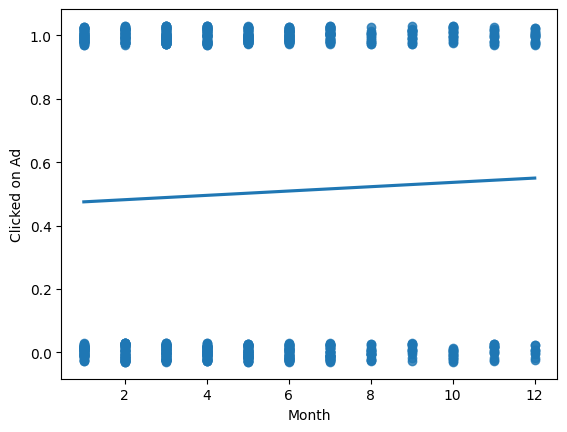

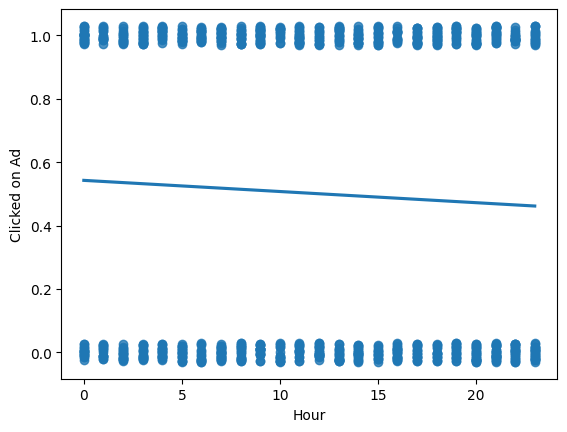

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
list = [0,1,2,3,6,9,10]
for i in list:
    sns.regplot(x=data.iloc[:,i],y="Clicked on Ad",y_jitter=0.03,data=data,logistic=True,ci=None)
    plt.show()

From the Logistic Regression Model we get :
* Mean of Accuracy score = 0.90
* (Hyperparameter tuning applied) we get : Mean of Accuracy score = 0.96

###Making Predictions

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# Fitting the model to the training data
logreg.fit(X_train, y_train)
# Make predictions on the test dataset
y_pred = logreg.predict(X_test)
# Printing the predicted labels
print(y_pred)

[0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0
 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1
 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0
 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0
 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Final Conclusion and inferences:
* The logistic regression model was fitted to the training data to predict the target variable.
* The average time spent on the website varied for different demographic groups, such as age, gender, and country.
* Outliers were identified in certain numerical variables, indicating potential anomalies in the data.
* The correlation matrix revealed relationships between variables, including negative correlation between age and time spent on site.
* Box plots showed the distribution of variables and highlighted any potential outliers.
* Feature engineering techniques were applied to enhance the predictive power of the model.
* The dataset was split into a training set (80%) and a test set (20%) for model evaluation.
* Logistic regression was applied as a classification model to predict ad clicks.
* The model was fine-tuned using hyperparameter optimization techniques.
Model performance was evaluated using various metrics such as accuracy and F1 score.
* Logistic regression predictions were also made.